In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train= get_training_data('../data/chest_xray/train')
test= get_training_data('../data/chest_xray/test')
val = get_training_data('../data/chest_xray/val')

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [7]:
train.shape
test.shape

(624, 2)

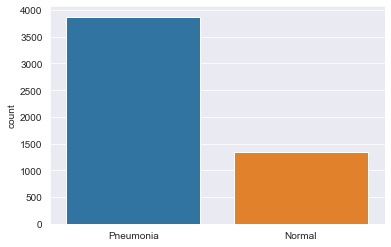

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  

Text(0.5, 1.0, 'NORMAL')

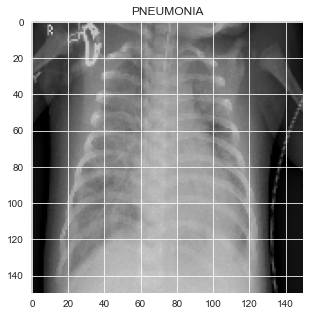

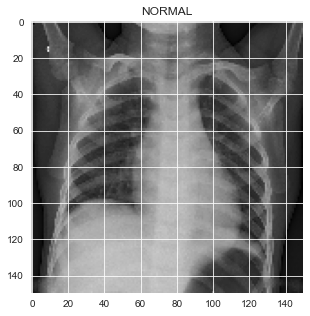

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])


In [13]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [14]:
x_train[1].shape

(150, 150)

In [15]:
X_train = np.array(x_train)/255

In [16]:
X_train.shape

(5216, 150, 150)

In [17]:
x_val= np.array(x_val)/ 255

In [18]:
x_test= np.array(x_test)/ 255

In [19]:
x_train= X_train.reshape(-1, img_size, img_size, 1) #3
y_train= np.array(y_train)

x_val= x_val.reshape(-1, img_size, img_size, 1) #3
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1) #3
y_test= np.array(y_test)

In [17]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [18]:
model= Sequential()
model.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11829376  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [20]:
history= model.fit(x_train,y_train, batch_size=32, epochs = 20, validation_data= (x_val, y_val))

Epoch 1/20
163/163 [==============================] - 79s 488ms/step - loss: 0.3738 - accuracy: 0.8796 - val_loss: 0.4932 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 83s 512ms/step - loss: 0.1373 - accuracy: 0.9584 - val_loss: 0.1647 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 99s 607ms/step - loss: 0.0902 - accuracy: 0.9672 - val_loss: 0.3027 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 102s 627ms/step - loss: 0.0603 - accuracy: 0.9793 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 5/20
163/163 [==============================] - 99s 607ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.1701 - val_accuracy: 0.9375
Epoch 6/20
163/163 [==============================] - 95s 580ms/step - loss: 0.0326 - accuracy: 0.9879 - val_loss: 0.1529 - val_accuracy: 0.9375
Epoch 7/20
163/163 [==============================] - 94s 576ms/step - loss: 0.0356 - accuracy: 0.9914 - val_loss: 0.0601 - val_a

In [22]:
print(x_test.shape)
print(y_test.shape)

(624, 150, 150, 1)
(624,)


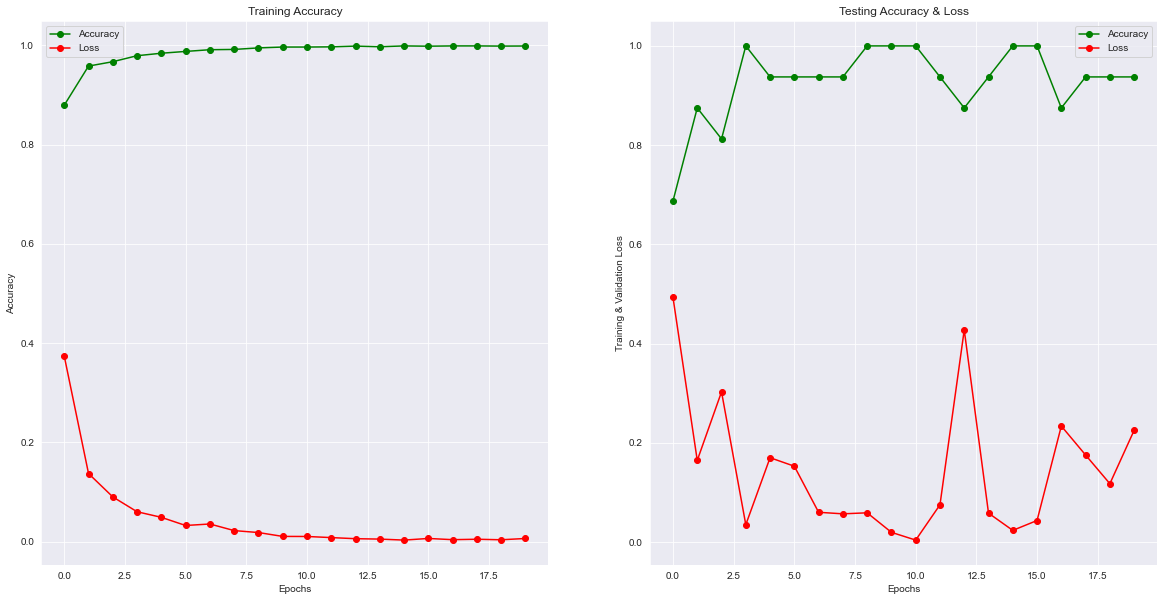

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.71      0.99      0.83       390
   Normal (Class 1)       0.97      0.31      0.47       234

           accuracy                           0.74       624
          macro avg       0.84      0.65      0.65       624
       weighted avg       0.81      0.74      0.69       624

[[388   2]
 [162  72]]
Sample of Normal X-rays results


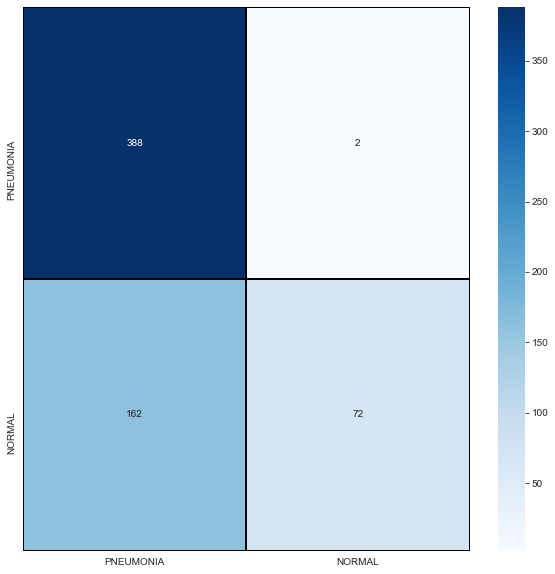

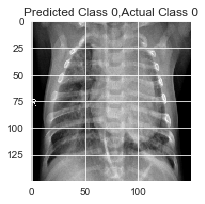

Sample of Pneumonia X-rays results


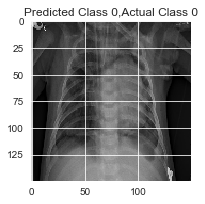

Sample of Pneumonia X-rays results


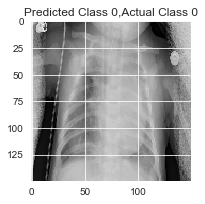

Sample of Pneumonia X-rays results


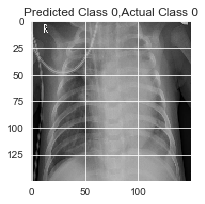

Sample of Pneumonia X-rays results


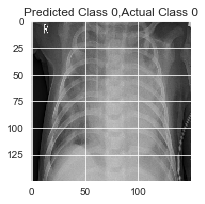

Sample of Pneumonia X-rays results


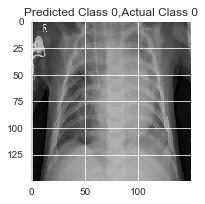

Sample of Pneumonia X-rays results


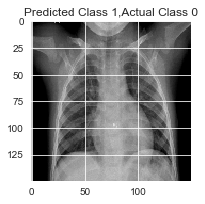

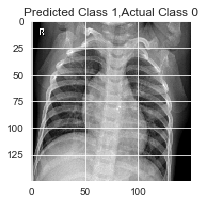

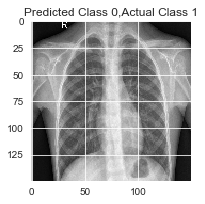

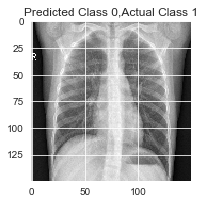

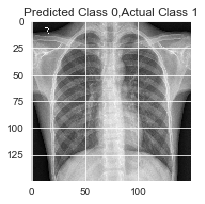

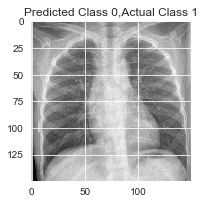

In [25]:
#Print Accuracy, Recall and Loss Charts
epochs = [i for i in range(20)]
labels = ['PNEUMONIA', 'NORMAL']
train_accuracy  = history.history['accuracy']
train_loss = history.history['loss']
#    train_recall  = history.history['recall']
val_accuracy  = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_accuracy , 'go-' , label = 'Accuracy')
ax[0].plot(epochs , train_loss , 'ro-' , label = 'Loss')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , val_accuracy , 'g-o' , label = 'Accuracy')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()
#plt.savefig('../visualization/Paul_test_fsm_model_accuracy.png', dpi=150)
# Print Confustion Matrix
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))
#Print Confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
#plt.savefig('../visualization/Paul_test_fsm_confusion-metrics.png', dpi=150)
# Print sample of Normal X-Rays
print("Sample of Normal X-rays results")
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]
pic = 0
for frame in correct[:6]:
    plt.figure(figsize=(10,10))
    plt.subplot(3, 2, pic+1)
    plt.imshow(x_test[frame].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[frame], y_test[frame]))
    pic += 1
    plt.show()
    print("Sample of Pneumonia X-rays results")
    # Print sample of Pneumonia X-rays
    pic = 0
for frame in incorrect[:6]:
    plt.figure(figsize=(10,10))
    plt.subplot(3, 2, pic+1)
    plt.imshow(x_test[frame].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[frame], y_test[frame]))
#    plt.tight_layout
    pic += 1
    plt.show()

In [26]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [27]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 81s 496ms/step - loss: 0.5559 - accuracy: 0.7611 - val_loss: 1.1684 - val_accuracy: 0.5625
Epoch 2/12
163/163 [==============================] - 76s 465ms/step - loss: 0.3360 - accuracy: 0.8491 - val_loss: 1.6643 - val_accuracy: 0.5625
Epoch 3/12
163/163 [==============================] - 77s 475ms/step - loss: 0.2943 - accuracy: 0.8715 - val_loss: 1.8606 - val_accuracy: 0.6250
Epoch 4/12
163/163 [==============================] - 78s 476ms/step - loss: 0.2631 - accuracy: 0.8907 - val_loss: 0.7405 - val_accuracy: 0.8750
Epoch 5/12
163/163 [==============================] - 78s 481ms/step - loss: 0.2416 - accuracy: 0.8997 - val_loss: 1.5109 - val_accuracy: 0.6875
Epoch 6/12
163/163 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9101
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 78s 478ms/step - loss: 0.2262 - accuracy: 0.9101 - val_l

In [28]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 116ms/step - loss: 0.3483 - accuracy: 0.9071
Loss of the model is -  0.34830036759376526
20/20 [==============================] - 2s 116ms/step - loss: 0.3483 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


In [29]:
model_2= Sequential()
model_2.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,1)))

model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Flatten())

model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Recall'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)       

In [30]:
history = model_2.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 94s 576ms/step - loss: 0.5003 - accuracy: 0.7701 - val_loss: 0.9524 - val_accuracy: 0.6250
Epoch 2/12
163/163 [==============================] - 92s 563ms/step - loss: 0.3247 - accuracy: 0.8637 - val_loss: 1.1356 - val_accuracy: 0.6250
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2728 - accuracy: 0.8907
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 91s 557ms/step - loss: 0.2728 - accuracy: 0.8907 - val_loss: 0.9551 - val_accuracy: 0.6250
Epoch 4/12
163/163 [==============================] - 90s 553ms/step - loss: 0.2016 - accuracy: 0.9222 - val_loss: 1.3118 - val_accuracy: 0.5625
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9245
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==============================] - 87s 536ms/step - loss: 0.1906 - accu

In [31]:
print("Loss of the model is - " , model_2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 121ms/step - loss: 0.2537 - accuracy: 0.9167
Loss of the model is -  0.25372201204299927
20/20 [==============================] - 3s 129ms/step - loss: 0.2537 - accuracy: 0.9167
Accuracy of the model is -  91.66666865348816 %
